# PROJECT 2 - Fortune 500 Companies

By Charlotte Song

This project finds out the top 5 states with the largest amount of Fortune 500 firms using two datasets: the Fortune 500 firms and the Top 1000 U.S. Companies. This analysis aims to find major regional trends by combining financial data with geographic information, presenting visual insights about the distribution of business centers throughout the US.

In [2]:
import plotly.io as pio

pio.renderers.default = "vscode+jupyterlab+notebook_connected"

In [4]:
import pandas as pd

#### 1) Import first dataset of top 1000 companies in the United States, including their located states and attributed industries etc.


In [7]:
TOP = pd.read_csv('TopCompanies.csv')
TOP

,longitude,latitude,company,location,industry,state,city
0,-94.2088,36.3729,Walmart,"Bentonville, AR",General Merchandisers,AR,Bentonville
1,-96.9489,32.8140,Exxon Mobil,"Irving, TX",Petroleum Refining,TX,Irving
2,-121.9780,37.7799,Chevron,"San Ramon, CA",Petroleum Refining,CA,San Ramon
3,-95.9980,41.2524,Berkshire Hathaway,"Omaha, NE",Insurance: Property and Casualty (Stock),NE,Omaha
4,-122.0320,37.3230,Apple,"Cupertino, CA","Computers, Office Equipment",CA,Cupertino
...,...,...,...,...,...,...,...
995,-73.7629,41.0340,Universal American,"White Plains, NY",Health Care: Insurance and Managed Care,NY,White Plains
996,-87.9790,41.9634,AAR,"Wood Dale, IL",Aerospace and Defense,IL,Wood Dale
997,-74.7524,41.1465,Selective Insurance Group,"Branchville, NJ",Insurance: Property and Casualty (Stock),NJ,Branchville
998,-73.5387,41.0534,Gartner,"Stamford, CT",Information Technology Services,CT,Stamford


#### 2) Adjust the index starting from 0 to 1

In [10]:
TOP.index = TOP.index + 1
TOP

,longitude,latitude,company,location,industry,state,city
1,-94.2088,36.3729,Walmart,"Bentonville, AR",General Merchandisers,AR,Bentonville
2,-96.9489,32.8140,Exxon Mobil,"Irving, TX",Petroleum Refining,TX,Irving
3,-121.9780,37.7799,Chevron,"San Ramon, CA",Petroleum Refining,CA,San Ramon
4,-95.9980,41.2524,Berkshire Hathaway,"Omaha, NE",Insurance: Property and Casualty (Stock),NE,Omaha
5,-122.0320,37.3230,Apple,"Cupertino, CA","Computers, Office Equipment",CA,Cupertino
...,...,...,...,...,...,...,...
996,-73.7629,41.0340,Universal American,"White Plains, NY",Health Care: Insurance and Managed Care,NY,White Plains
997,-87.9790,41.9634,AAR,"Wood Dale, IL",Aerospace and Defense,IL,Wood Dale
998,-74.7524,41.1465,Selective Insurance Group,"Branchville, NJ",Insurance: Property and Casualty (Stock),NJ,Branchville
999,-73.5387,41.0534,Gartner,"Stamford, CT",Information Technology Services,CT,Stamford


#### 3) Import second dataset of Fortune 500 companies in the United States, including their rank, revenues, and profits etc.

In [16]:
F500 = pd.read_csv('F500.csv')
F500

,rank,company,employees,previousrank,revenues,revenuechange,profits,profitschange,assets,marketvalue
0,1,Walmart,"2,300,000",1.0,"$485,873.00",0.80%,"$13,643.00",-7.20%,"$198,825.00","$218,619.00"
1,2,Berkshire Hathaway,"367,700",4.0,"$223,604.00",6.10%,"$24,074.00",0.00%,"$620,854.00","$411,035.00"
2,3,Apple,"116,000",3.0,"$215,639.00",-7.70%,"$45,687.00",-14.40%,"$321,686.00","$753,718.00"
3,4,Exxon Mobil,"72,700",2.0,"$205,004.00",-16.70%,"$7,840.00",-51.50%,"$330,314.00","$340,056.00"
4,5,McKesson,"68,000",5.0,"$192,487.00",6.20%,"$2,258.00",53.00%,"$56,563.00","$31,439.00"
...,...,...,...,...,...,...,...,...,...,...
495,496,Michaels Cos.,"31,000",517.0,"$5,197.00",5.80%,$378.20,4.20%,"$2,148.00","$4,229.00"
496,497,Toll Brothers,"4,200",576.0,"$5,170.00",23.90%,$382.10,5.20%,"$9,737.00","$5,872.00"
497,498,Yahoo,"8,500",513.0,"$5,169.00",4.00%,($214.30),-,"$48,083.00","$44,391.00"
498,499,Vistra Energy,"4,431",NaN,"$5,164.00",-,-,-,"$15,167.00","$6,968.00"


In [18]:
F500 = F500.set_index('rank')
F500

,company,employees,previousrank,revenues,revenuechange,profits,profitschange,assets,marketvalue
rank,,,,,,,,,
1,Walmart,"2,300,000",1.0,"$485,873.00",0.80%,"$13,643.00",-7.20%,"$198,825.00","$218,619.00"
2,Berkshire Hathaway,"367,700",4.0,"$223,604.00",6.10%,"$24,074.00",0.00%,"$620,854.00","$411,035.00"
3,Apple,"116,000",3.0,"$215,639.00",-7.70%,"$45,687.00",-14.40%,"$321,686.00","$753,718.00"
4,Exxon Mobil,"72,700",2.0,"$205,004.00",-16.70%,"$7,840.00",-51.50%,"$330,314.00","$340,056.00"
5,McKesson,"68,000",5.0,"$192,487.00",6.20%,"$2,258.00",53.00%,"$56,563.00","$31,439.00"
...,...,...,...,...,...,...,...,...,...
496,Michaels Cos.,"31,000",517.0,"$5,197.00",5.80%,$378.20,4.20%,"$2,148.00","$4,229.00"
497,Toll Brothers,"4,200",576.0,"$5,170.00",23.90%,$382.10,5.20%,"$9,737.00","$5,872.00"
498,Yahoo,"8,500",513.0,"$5,169.00",4.00%,($214.30),-,"$48,083.00","$44,391.00"


#### 4) Clean the second dataset for the revenue to numeric input

In [21]:
F500['revenues'] = F500['revenues'].replace('[\$,]', '', regex=True).astype(float)
F500

,company,employees,previousrank,revenues,revenuechange,profits,profitschange,assets,marketvalue
rank,,,,,,,,,
1,Walmart,"2,300,000",1.0,485873.0,0.80%,"$13,643.00",-7.20%,"$198,825.00","$218,619.00"
2,Berkshire Hathaway,"367,700",4.0,223604.0,6.10%,"$24,074.00",0.00%,"$620,854.00","$411,035.00"
3,Apple,"116,000",3.0,215639.0,-7.70%,"$45,687.00",-14.40%,"$321,686.00","$753,718.00"
4,Exxon Mobil,"72,700",2.0,205004.0,-16.70%,"$7,840.00",-51.50%,"$330,314.00","$340,056.00"
5,McKesson,"68,000",5.0,192487.0,6.20%,"$2,258.00",53.00%,"$56,563.00","$31,439.00"
...,...,...,...,...,...,...,...,...,...
496,Michaels Cos.,"31,000",517.0,5197.0,5.80%,$378.20,4.20%,"$2,148.00","$4,229.00"
497,Toll Brothers,"4,200",576.0,5170.0,23.90%,$382.10,5.20%,"$9,737.00","$5,872.00"
498,Yahoo,"8,500",513.0,5169.0,4.00%,($214.30),-,"$48,083.00","$44,391.00"


#### 5) Merge two datasets by company through inner join

In [24]:
merged_500 = pd.merge(F500, TOP, how='inner')
merged_500

,company,employees,previousrank,revenues,revenuechange,profits,profitschange,assets,marketvalue,longitude,latitude,location,industry,state,city
0,Walmart,"2,300,000",1.0,485873.0,0.80%,"$13,643.00",-7.20%,"$198,825.00","$218,619.00",-94.2088,36.3729,"Bentonville, AR",General Merchandisers,AR,Bentonville
1,Berkshire Hathaway,"367,700",4.0,223604.0,6.10%,"$24,074.00",0.00%,"$620,854.00","$411,035.00",-95.9980,41.2524,"Omaha, NE",Insurance: Property and Casualty (Stock),NE,Omaha
2,Apple,"116,000",3.0,215639.0,-7.70%,"$45,687.00",-14.40%,"$321,686.00","$753,718.00",-122.0320,37.3230,"Cupertino, CA","Computers, Office Equipment",CA,Cupertino
3,Exxon Mobil,"72,700",2.0,205004.0,-16.70%,"$7,840.00",-51.50%,"$330,314.00","$340,056.00",-96.9489,32.8140,"Irving, TX",Petroleum Refining,TX,Irving
4,McKesson,"68,000",5.0,192487.0,6.20%,"$2,258.00",53.00%,"$56,563.00","$31,439.00",-122.4190,37.7749,"San Francisco, CA",Wholesalers: Health Care,CA,San Francisco
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
469,Big Lots,"23,150",495.0,5200.0,0.20%,$152.80,7.00%,"$1,608.00","$2,180.00",-82.9988,39.9612,"Columbus, OH",Specialty Retailers: Other,OH,Columbus
470,Michaels Cos.,"31,000",517.0,5197.0,5.80%,$378.20,4.20%,"$2,148.00","$4,229.00",-96.9489,32.8140,"Irving, TX",Specialty Retailers: Other,TX,Irving
471,Toll Brothers,"4,200",576.0,5170.0,23.90%,$382.10,5.20%,"$9,737.00","$5,872.00",-75.1285,40.1784,"Horsham, PA",Homebuilders,PA,Horsham
472,Yahoo,"8,500",513.0,5169.0,4.00%,($214.30),-,"$48,083.00","$44,391.00",-122.0360,37.3688,"Sunnyvale, CA",Internet Services and Retailing,CA,Sunnyvale


In [26]:
merged_500.reset_index(drop=True, inplace=True)  
merged_500.index = merged_500.index + 1  

merged_500.index.name = 'rank'
merged_500

,company,employees,previousrank,revenues,revenuechange,profits,profitschange,assets,marketvalue,longitude,latitude,location,industry,state,city
rank,,,,,,,,,,,,,,,
1,Walmart,"2,300,000",1.0,485873.0,0.80%,"$13,643.00",-7.20%,"$198,825.00","$218,619.00",-94.2088,36.3729,"Bentonville, AR",General Merchandisers,AR,Bentonville
2,Berkshire Hathaway,"367,700",4.0,223604.0,6.10%,"$24,074.00",0.00%,"$620,854.00","$411,035.00",-95.9980,41.2524,"Omaha, NE",Insurance: Property and Casualty (Stock),NE,Omaha
3,Apple,"116,000",3.0,215639.0,-7.70%,"$45,687.00",-14.40%,"$321,686.00","$753,718.00",-122.0320,37.3230,"Cupertino, CA","Computers, Office Equipment",CA,Cupertino
4,Exxon Mobil,"72,700",2.0,205004.0,-16.70%,"$7,840.00",-51.50%,"$330,314.00","$340,056.00",-96.9489,32.8140,"Irving, TX",Petroleum Refining,TX,Irving
5,McKesson,"68,000",5.0,192487.0,6.20%,"$2,258.00",53.00%,"$56,563.00","$31,439.00",-122.4190,37.7749,"San Francisco, CA",Wholesalers: Health Care,CA,San Francisco
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
470,Big Lots,"23,150",495.0,5200.0,0.20%,$152.80,7.00%,"$1,608.00","$2,180.00",-82.9988,39.9612,"Columbus, OH",Specialty Retailers: Other,OH,Columbus
471,Michaels Cos.,"31,000",517.0,5197.0,5.80%,$378.20,4.20%,"$2,148.00","$4,229.00",-96.9489,32.8140,"Irving, TX",Specialty Retailers: Other,TX,Irving
472,Toll Brothers,"4,200",576.0,5170.0,23.90%,$382.10,5.20%,"$9,737.00","$5,872.00",-75.1285,40.1784,"Horsham, PA",Homebuilders,PA,Horsham


#### 6) Find out Top 5 states with the most Fortune companies

In [29]:
counts = merged_500['state'].value_counts().reset_index()
counts.columns = ['state', 'counts'] 

top_5_states = counts.head(5)
print(top_5_states)

  state  counts
0    NY      52
1    CA      52
2    TX      44
3    IL      34
4    OH      25


#### 7) Visualization for the Top 5 states

In [32]:
import plotly.express as px

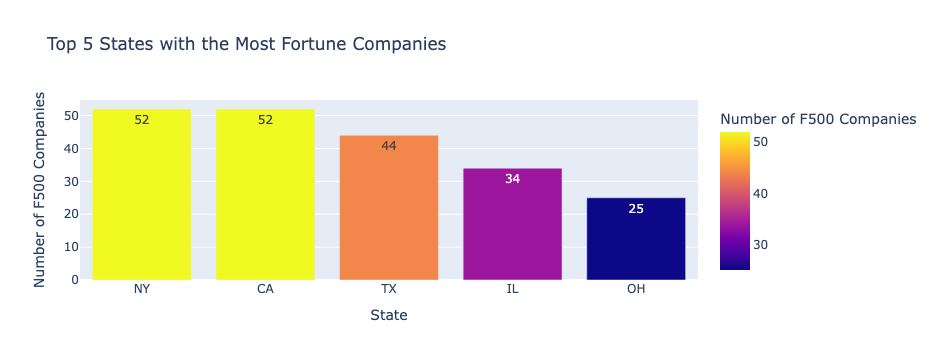

In [34]:
fig = px.bar(top_5_states, x='state', y='counts', 
             title='Top 5 States with the Most Fortune Companies',
             labels={'state': 'State', 'counts': 'Number of F500 Companies'},
             color='counts', 
             text='counts')
fig.show()

#### 8) Takeaways

Reflected from the visualization, states like CA, NY and TX have the greatest number of Fortune 500 companies. The business-friendly policies may play in attracting in major corporations to locate in these states. Fortune 500 corporations are more likely to be concentrated in states with strong infrastructure, trained labor, and beneficial tax systems. These characteristics make these states attractive locations for companies wishing to grow or start up business. 

In practice, investors can use this information to find opportunities for growth linked these business centers; politicians can develop plans to attract and maintain enterprises to enhance state revenues. In addition, job applicants might think about moving to states with a high concentration of Fortune 500 companies in order to take advantage of reliable possibilities and economic growth.